# Pose e Transformação Coordenada Usando Marcadores Aruco

Nesta atividade, vamos aprender sobre o conceito de pose e transformação coordenada. Vamos também aprender como usar marcadores Aruco para estimar a distância e orientação de um objeto em relação a câmera. Depois, vamos usar essa informação para transformar a coordenada do objeto para a coordenada da câmera.

## O que é Pose?
Pose é a posição e orientação de um objeto em relação a um sistema de coordenada. Sistema de coordenada é um conjunto de eixos que definem a posição e orientação de um objeto.

Na imagem abaixo, temos dois sistemas de coordenadas diferentes, um para a câmera e outro global (World). Cada um desses sistemas de coordenadas tem sua origem (ponto de referência) e seus eixos.  

![Pose](img/pose.png)

Em geral, quando utilizamos visão computacional, o sistema de coordenadas da câmera é o que chamamos de *camera frame* e o sistema de coordenadas global é o que chamamos de *world frame*.

## Componentes da Pose
### Posição
A posição de um objeto é geralmente representada por um vetor t⃗=[tx,ty,tz]t
=[tx​,ty​,tz​] que indica o deslocamento do objeto em relação a um sistema de coordenadas em cada um dos eixos.

### Orientação - Euler Angles
A orientação de um objeto pode ser descrita através de ângulos de Euler. Estes são três ângulos que especificam a rotação do objeto em torno dos eixos XX, YY, e ZZ. Geralmente, rotações nos eiros XX, YY, e ZZ são chamadas de roll, pitch, e yaw, respectivamente, como mostrado na imagem abaixo.

![Euler Angles](img/euler.jpg)

Este método é intuitivo, mas pode sofrer de "gimbal lock". Gimbal lock é um problema que ocorre quando dois dos eixos de rotação estão alinhados. Neste caso, a rotação em torno de um eixo é perdida, gerando ambiguidade na orientação do objeto.

### Orientação - Quaternion

Uma alternativa aos ângulos de Euler é o uso de quaternions. Um quaternion é uma estrutura matemática que evita o problema de gimbal lock e é computacionalmente mais eficiente para algumas operações. Ele é representado como q=w+xi+yj+zkq=w+xi+yj+zk.

Assista o vídeo abaixo para entender como funciona a representação de orientação usando quaternions.

[Quaternions and 3d rotation, explained interactively](https://www.youtube.com/watch?v=zjMuIxRvygQ&t=233s)


## Marcadores Aruco
Marcadores ArUco são marcadores quadrados binários que são muito eficazes para determinar a pose. Eles são frequentemente usados em realidade aumentada e robótica para rastreamento de posição e orientação.

No arquivo [module_aruco.py](module_aruco.py), temos uma classe que encapsula as funções necessárias para detectar marcadores Aruco e estimar a pose do marcador em relação a câmera, ou seja, no sistema de coordenadas da **câmera**.
A classe também possui uma função para desenhar o marcador na imagem.

Cada marcador Aruco possui um ID único. O ID é um número inteiro que varia de 0 a 249.

O exemplo abaixo mostra como usar a classe Aruco para detectar marcadores Aruco e desenhar o marcador na imagem.

Vetor de translação:  [178.25621213  46.57775451 186.73707854]
Vetor de rotação:  [-8.35870478 -2.17889376 -8.05553883]
Saida da funcao: dict_keys(['id', 'rvec', 'tvec', 'distancia', 'corners', 'centro'])


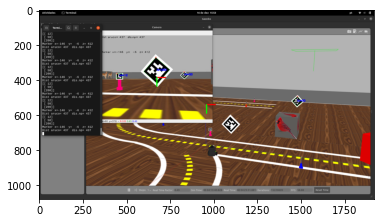

In [4]:
from module_aruco import Aruco3d
import cv2
import numpy as np
import matplotlib.pyplot as plt
#inicializa a classe Aruco3d
Arucos = Aruco3d()

bgr = cv2.imread("img/aruco.png")
#Chama a funcao detectaAruco
bgr, results = Arucos.detectaAruco(bgr)
bgr = Arucos.drawAruco(bgr, results[0])

print('Vetor de translação: ', results[0]['tvec'])
print('Vetor de rotação: ', results[0]['rvec'])

print(f'Saida da funcao: {results[0].keys()}')

plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))
plt.show()

Pelo exemplo, podemos ver que a podemos detectar todos os marcadores Aruco na imagem usando o atributo da classe `detectaAruco`.
A saida é uma lista de dicionários, onde cada dicionário contém as seguintes chaves:

* `id`: ID do marcador

* `corners`: coordenadas dos cantos do marcador na imagem

* `centro`: coordenadas do centro do marcador na imagem

* `tvec`: vetor de translação do marcador em relação a câmera [tx, ty, tz]

* `rvec`: vetor de rotação do marcador em relação a câmera [rx, ry, rz]

* `distancia`: distância do marcador em relação a câmera - calculada usando o vetor de translação

Você pode também rodar diretamente o arquivo [module_aruco.py](module_aruco.py) para ver o resultado da detecção de marcadores Aruco.

Modifique a função `main` para rodar usando a webcam do seu computador e verifique o mesmo efeito desenvolvido na APS 2.

**Pergunta:** A distância do marcador em relação a câmera está correta? Por que?

<p>
<details>
<summary>Spoiler</summary>

A distância do marcador em relação a câmera não está correta. Porque o arquivo de calibração utilizado foi gerado para a câmera do robô e não para a webcam do seu computador.

</details>
</p>